NAME: NAGARE SACHIN
ID: sannagare99@gmail.com

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

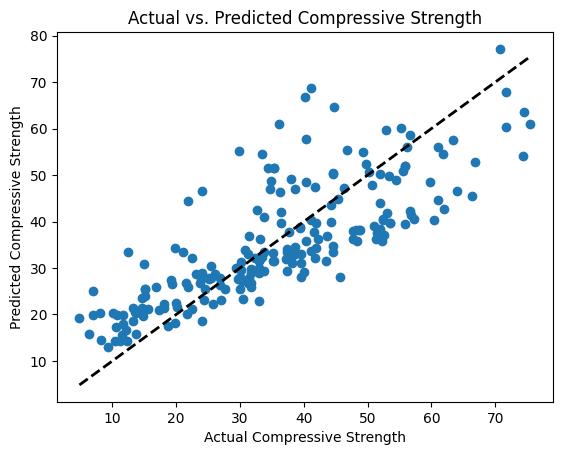

                                             Feature  Coefficient
0          Cement (component 1)(kg in a m^3 mixture)     0.118994
1  Blast Furnace Slag (component 2)(kg in a m^3 m...     0.108536
2         Fly Ash (component 3)(kg in a m^3 mixture)     0.082152
3          Water  (component 4)(kg in a m^3 mixture)    -0.135276
4  Superplasticizer (component 5)(kg in a m^3 mix...     0.310570
5  Coarse Aggregate  (component 6)(kg in a m^3 mi...     0.017867
6  Fine Aggregate (component 7)(kg in a m^3 mixture)     0.024100
7                                          Age (day)     0.116439


In [4]:
data_url = '/content/Concrete_Data.csv'
df = pd.read_csv(data_url)

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
y = df['Concrete compressive strength(MPa, megapascals) ']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize the actual vs. predicted compressive strength
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Compressive Strength')
plt.ylabel('Predicted Compressive Strength')
plt.title('Actual vs. Predicted Compressive Strength')
plt.show()

# Feature importance (coefficients) for linear regression
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(feature_importance)

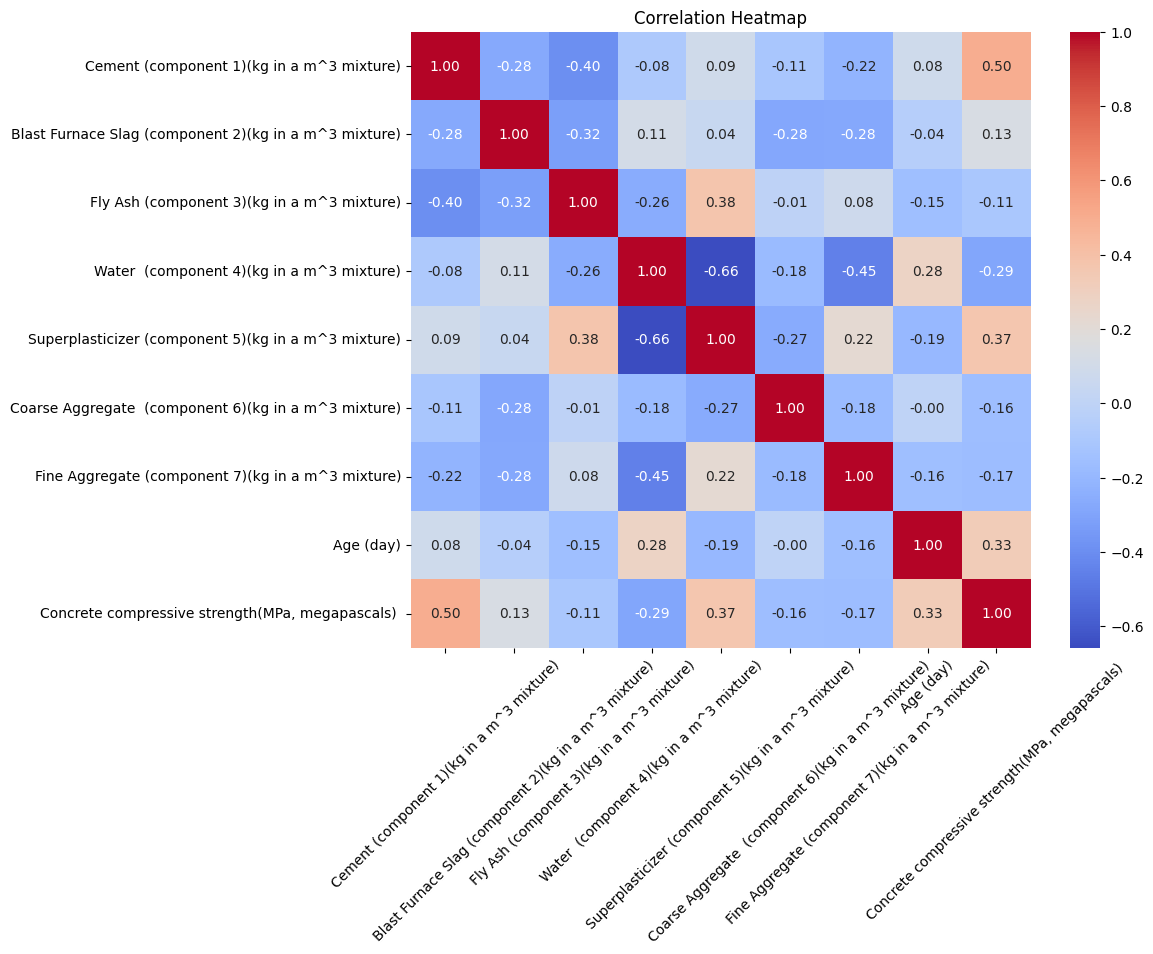

In [7]:
correlation_matrix = df.corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Customize plot appearance
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()
